In [3]:
import numpy as np
import cv2
from show_image import *
from datascience import *
import math
%matplotlib inline

---

- ## 평행 이동
    - ### 영상의 원점을 기준으로 모든 화소를 동일하게 가로 방향과 세로 방향으로 옮기기

    <br>

    - #### 순방향사상
        - #### $ x' = x + dx $
        - #### $ y' = y + dy $
     
    - #### 역방향사상
        - #### $ x = x' - dx $
        - #### $ y = y' - dy $

<br>

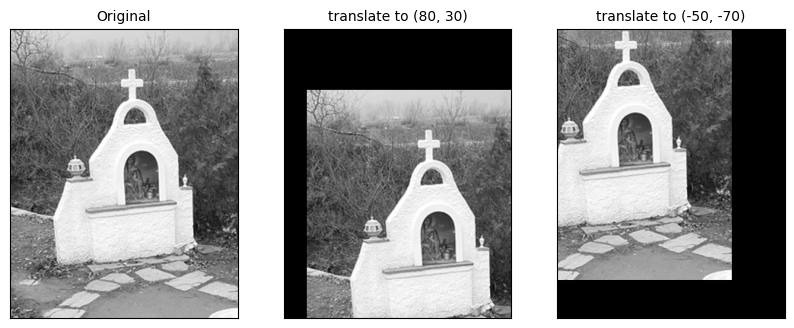

In [13]:
image = cv2.imread("./images/chap08/translate.jpg", cv2.IMREAD_GRAYSCALE)

def translate(image, pos):
    image_h, image_w = image.shape[:2]
    ty, tx = pos
    new_image = np.zeros(image.shape[:2], dtype="uint8")

    for y in range(max(0, ty), min(image_h, image_h + ty)):
        for x in range(max(0, tx), min(image_w, image_w + tx)):
            oy, ox = y + (-1 * ty), x + (-1 * tx)
            new_image.itemset((y, x), image.item((oy, ox)))
    return new_image

translate1 = translate(image, (80, 30))
translate2 = translate(image, (-50, -70))
show_images({"Original": image, "translate to (80, 30)": translate1, "translate to (-50, -70)": translate2}, 10)

---

- ## 회전
    - ### 원점을 기준으로 원하는 각도만큼 모든 화소에 대해서 회전 변환을 시키는 것
 
    <br>

- ### 순방향 사상
    - #### $ x' = xcos\theta - ysin\theta $
    - #### $ y' = xsin\theta + ycos\theta $

    ![image](https://github.com/kks00/visual_info_processing/assets/68108664/3c12edd1-28c3-401f-938b-843542f5644c)

<!-- ### $$
 \begin{pmatrix}
 x'\\
 y'
 \end{pmatrix}
 =
 \begin{pmatrix}
  cos\theta & -sin\theta \\
  sin\theta & cos\theta
 \end{pmatrix}
 \begin{pmatrix}
  x \\
  y \\
 \end{pmatrix}
$$ -->

- ### 역방향 사상
    - #### $ x = x'cos\theta + y'sin\theta $
    - #### $ y = -x'sin\theta + y'cos\theta $

    ![image](https://github.com/kks00/visual_info_processing/assets/68108664/8c80148c-3533-4062-a91c-6056ac46675c)

<!-- ### $$
 \begin{pmatrix}
 x\\
 y
 \end{pmatrix}
 =
 \begin{pmatrix}
  cos\theta & sin\theta \\
  -sin\theta & cos\theta
 \end{pmatrix}
 \begin{pmatrix}
  x' \\
  y' \\
 \end{pmatrix}
$$ -->

<br>

- ### 영상의 중심을 회전의 기준으로 하는 경우
    - #### 1. 영상을 원점으로 평행이동
    - #### 2. 회전 수행
    - #### 3. 영상을 다시 중심으로 평행이동

#### $$ x = (x' - center X) cos\theta + (y' - center Y) sin\theta + center X $$

#### $$ y = - (x' - center X) sin\theta + (y' - center Y) cos\theta + center Y $$

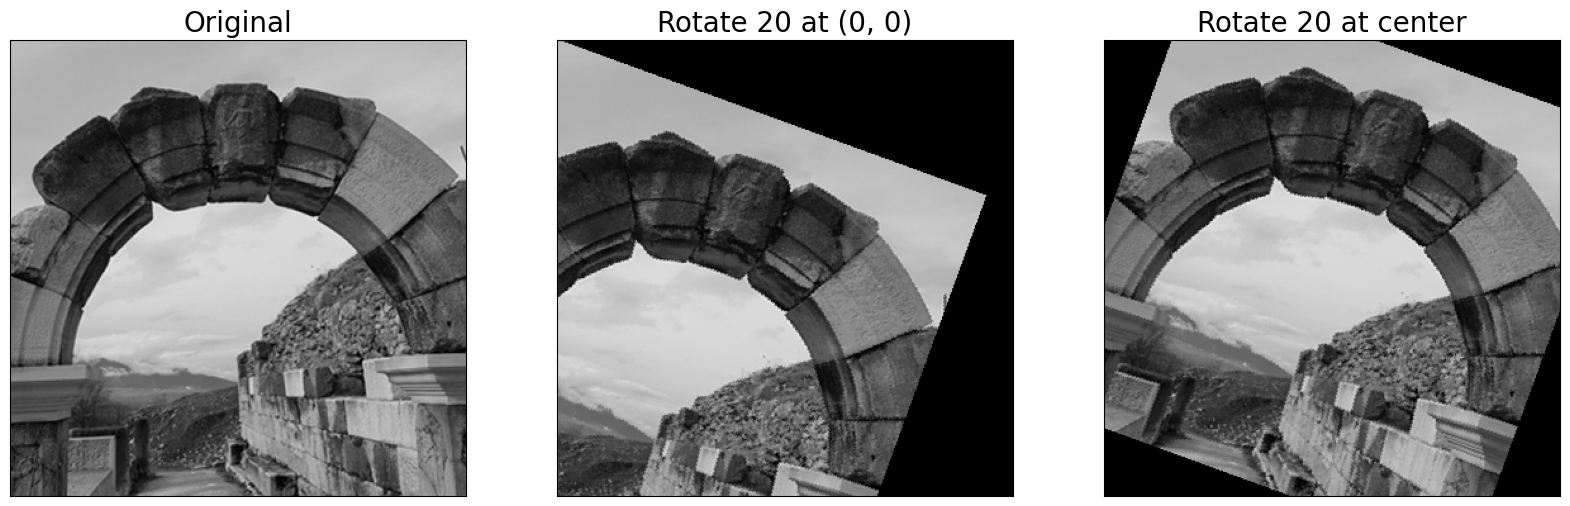

In [25]:
image = cv2.imread("./images/chap08/rotate.jpg", cv2.IMREAD_GRAYSCALE)

def rotate(image, angle, center_pos):
    image_h, image_w = image.shape[:2]
    center_y, center_x = center_pos

    result_img = np.zeros((image_h, image_w), dtype="uint8")

    rad = (angle / 180) * 3.14
    cos, sin = np.cos(rad), np.sin(rad)
    
    for y in range(image_h):
        for x in range(image_w):
            source_x = (x - center_x) * cos + (y - center_y) * sin + center_x
            source_y = -1 * (x - center_x) * sin + (y - center_y) * cos + center_y
            source_y, source_x = int(source_y), int(source_x)

            if 0 <= source_x < image_w and 0 <= source_y < image_h:
                result_img.itemset((y, x), image.item((source_y, source_x)))

    return result_img

rotate1 = rotate(image, 20, (0, 0))
center_y, center_x = np.array(image.shape[:2], dtype="uint32") / 2
rotate2 = rotate(image, 20, (center_y, center_x))
show_images({"Original": image, "Rotate 20 at (0, 0)": rotate1, "Rotate 20 at center": rotate2}, 20)

---